In [1]:
import pandas as pd

df=pd.read_csv("C:\\Users\Achraf\Downloads\Titanic.csv")
df.describe()
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import random
#read csv
df=pd.read_csv("C:\\Users\Achraf\Downloads\Titanic.csv")


#plus que 80% des cabin ont une valeur null donc on va l'effacer
df.drop('Cabin',axis=1,inplace=True)




#print(df['Embarked'].value_counts())
df['Embarked'].fillna('S',inplace=True)


#g=sns.FacetGrid(df,col='Survived')
#g.map(plt.hist,'Age',bins=20)

df['Age'].fillna(random.randint(20,33),inplace=True)


In [4]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [5]:
def fn(string) :
    string=string.replace('.',',',1)  
    string=string.split(",")[1]
    string=string.replace(" ","")
    return(string)
titre=df["Name"]    
for i in range(0,891):
    titre[i]=fn(titre[i])

titre  

C:\Users\Achraf\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0          Mr
1         Mrs
2        Miss
3         Mrs
4          Mr
5          Mr
6          Mr
7      Master
8         Mrs
9         Mrs
10       Miss
11       Miss
12         Mr
13         Mr
14       Miss
15        Mrs
16     Master
17         Mr
18        Mrs
19        Mrs
20         Mr
21         Mr
22       Miss
23         Mr
24       Miss
25        Mrs
26         Mr
27         Mr
28       Miss
29         Mr
        ...  
861        Mr
862       Mrs
863      Miss
864        Mr
865       Mrs
866      Miss
867        Mr
868        Mr
869    Master
870        Mr
871       Mrs
872        Mr
873        Mr
874       Mrs
875      Miss
876        Mr
877        Mr
878        Mr
879       Mrs
880       Mrs
881        Mr
882      Miss
883        Mr
884        Mr
885       Mrs
886       Rev
887      Miss
888      Miss
889        Mr
890        Mr
Name: Name, Length: 891, dtype: object

In [6]:
df['Name'].value_counts()

print(df.isnull().sum())
print(df['Name'].value_counts())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
Mr             517
Miss           182
Mrs            125
Master          40
Dr               7
Rev              6
Col              2
Mlle             2
Major            2
Don              1
theCountess      1
Jonkheer         1
Mme              1
Lady             1
Capt             1
Ms               1
Sir              1
Name: Name, dtype: int64


In [7]:
import numpy as np

#on va ajoutter le titre dans notre df
df['Title']=titre
 



Title_Dictionary = {
                    "Capt":"Officer",
                    "Col": "Officer",
                    "Major": "Officer",
                      "Dr": "Officer",
                    "Rev": "Officer",
                    "Jonkheer": "Royalty",
                    "Don": "Royalty",
                    "Sir" : "Royalty",
                   "Lady" : "Royalty",
                  "theCountess" : "Royalty",
                    "Dona": "Royalty" ,
                    "Mme":  "Miss",
                    "Mlle": "Miss",
                    "Miss" :"Miss",
                    "Ms":  "Mrs",
                    "Mr" : "Mrs",
                    "Mrs" :"Mrs",
                    "Master" :"Master"
                    }
df['Name']=df['Name'].map(Title_Dictionary)







In [8]:

print(df['Name'].value_counts())

Mrs        643
Miss       185
Master      40
Officer     18
Royalty      5
Name: Name, dtype: int64


In [9]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64


In [10]:
familyMembers = df["SibSp"]+df["Parch"]
df=df.drop("SibSp", axis = 1)
df=df.drop("Parch", axis = 1)
df.insert(5, value = familyMembers, column = "Family members")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId       891 non-null int64
Survived          891 non-null int64
Pclass            891 non-null int64
Name              891 non-null object
Sex               891 non-null object
Family members    891 non-null int64
Age               891 non-null float64
Ticket            891 non-null object
Fare              891 non-null float64
Embarked          891 non-null object
Title             891 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


# # Data_Vis

In [12]:
df.corr()

,PassengerId,Survived,Pclass,Family members,Age,Fare
PassengerId,1.000000,-0.005007,-0.035144,-0.040143,0.036186,0.012658
Survived,-0.005007,1.000000,-0.338481,0.016639,-0.052872,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.065997,-0.356187,-0.549500
Family members,-0.040143,0.016639,0.065997,1.000000,-0.236339,0.217138
Age,0.036186,-0.052872,-0.356187,-0.236339,1.000000,0.107554
Fare,0.012658,0.257307,-0.549500,0.217138,0.107554,1.000000


In [13]:
df['Sex']=df['Sex'].map({'male':0,'female':1})

In [14]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
df['Embarked']=df['Embarked'].map({'S':0,'C':1,'Q':2})  
print(df.isnull().sum())

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Family members    0
Age               0
Ticket            0
Fare              0
Embarked          0
Title             0
dtype: int64


In [16]:
df['Name']=df['Name'].map({'Royalty':1,'Officer':2,'Master':3,'Miss':4,'Mrs':5})
print(df.isnull().sum())

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Family members    0
Age               0
Ticket            0
Fare              0
Embarked          0
Title             0
dtype: int64


In [17]:
x=df[['Name','Age','Pclass','Sex','Embarked','Family members']]
y=df['Survived']

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import pyplot as plt
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.20,random_state=42)

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
logreg = LogisticRegression()


In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Family members,Age,Ticket,Fare,Embarked,Title
0,1,0,3,5,0,1,22.0,A/5 21171,7.2500,0,Mr
1,2,1,1,5,1,1,38.0,PC 17599,71.2833,1,Mrs
2,3,1,3,4,1,0,26.0,STON/O2. 3101282,7.9250,0,Miss
3,4,1,1,5,1,1,35.0,113803,53.1000,0,Mrs
4,5,0,3,5,0,0,35.0,373450,8.0500,0,Mr


In [22]:
logreg.fit(x_train,y_train)

C:\Users\Achraf\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
y_pred= logreg.predict(x_test)

In [24]:
confusion_matrix=pd.crosstab(y_test,y_pred,rownames=['actuelle'],colnames=['predected'])

In [25]:
print(confusion_matrix)

predected   0   1
actuelle         
0          89  16
1          22  52


In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))


#l'occuracy nous permet de conclure que  80% des prediction sont vrai 
#precision non indique que le model admet une haute precision lors du choix du postive et negative
#le recall nous permet de conclure que losque la valeur et 0 "non survived " la prediction n'est precise comme losque la valeur est 1
#conclusion : notre model est plus sensible a predecter des valeur negative& 

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       105
           1       0.76      0.70      0.73        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [27]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.7877094972067039


In [28]:

#donner la probability du class 0 dans la coloone 0  1 dans la colone 1
y_pred_prob = logreg.predict_proba(x_test)[:,1]
y_pred_prob

array([0.12691277, 0.21929626, 0.12149384, 0.85687868, 0.71112284,
       0.92325151, 0.74909599, 0.09488981, 0.77978958, 0.90673273,
       0.34622285, 0.07654162, 0.47975558, 0.12275909, 0.20158385,
       0.92549906, 0.32249347, 0.74909599, 0.31519628, 0.33898128,
       0.11267724, 0.40358707, 0.63855197, 0.12149384, 0.11267724,
       0.08328948, 0.56248838, 0.21929626, 0.09359693, 0.62111192,
       0.12378895, 0.66513104, 0.51196529, 0.65556314, 0.12612119,
       0.11068947, 0.43473498, 0.74909599, 0.93258876, 0.11267724,
       0.19485445, 0.08694779, 0.11267724, 0.16610762, 0.52583384,
       0.06801153, 0.12378895, 0.11482757, 0.11267724, 0.26121385,
       0.6749183 , 0.80757064, 0.03520504, 0.457341  , 0.07670242,
       0.90852104, 0.21566624, 0.86798057, 0.79448435, 0.76860467,
       0.11923549, 0.83757443, 0.76569529, 0.45580659, 0.16610762,
       0.6784656 , 0.25798514, 0.10244634, 0.1138944 , 0.86301484,
       0.73994282, 0.89646157, 0.50130233, 0.88823871, 0.11482

Text(0, 0.5, 'Frequency')

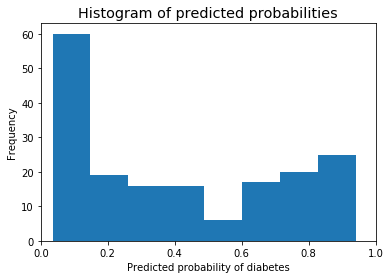

In [29]:
import matplotlib.pyplot as plt
plt.hist(y_pred_prob, bins=8)
plt.rcParams['font.size'] = 12
# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

#je plote la frequence des proba du class 1 les survived et on constate qu'on doit changer la threshold


In [30]:
from sklearn.preprocessing import binarize

In [31]:
y_pred_prob1 = logreg.predict_proba(x_test)
print (y_pred_prob1)

[[0.87308723 0.12691277]
 [0.78070374 0.21929626]
 [0.87850616 0.12149384]
 [0.14312132 0.85687868]
 [0.28887716 0.71112284]
 [0.07674849 0.92325151]
 [0.25090401 0.74909599]
 [0.90511019 0.09488981]
 [0.22021042 0.77978958]
 [0.09326727 0.90673273]
 [0.65377715 0.34622285]
 [0.92345838 0.07654162]
 [0.52024442 0.47975558]
 [0.87724091 0.12275909]
 [0.79841615 0.20158385]
 [0.07450094 0.92549906]
 [0.67750653 0.32249347]
 [0.25090401 0.74909599]
 [0.68480372 0.31519628]
 [0.66101872 0.33898128]
 [0.88732276 0.11267724]
 [0.59641293 0.40358707]
 [0.36144803 0.63855197]
 [0.87850616 0.12149384]
 [0.88732276 0.11267724]
 [0.91671052 0.08328948]
 [0.43751162 0.56248838]
 [0.78070374 0.21929626]
 [0.90640307 0.09359693]
 [0.37888808 0.62111192]
 [0.87621105 0.12378895]
 [0.33486896 0.66513104]
 [0.48803471 0.51196529]
 [0.34443686 0.65556314]
 [0.87387881 0.12612119]
 [0.88931053 0.11068947]
 [0.56526502 0.43473498]
 [0.25090401 0.74909599]
 [0.06741124 0.93258876]
 [0.88732276 0.11267724]


In [32]:
#puisque notre model est plus sensible a prevoire les valeur postive on peut augmenter la proba de choix le threshhold 
y_pred_class = binarize(y_pred_prob1, 0.65)
y_pred_class

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.

In [33]:
print(metrics.confusion_matrix(y_test, y_pred_class[:,1]))

[[98  7]
 [24 50]]


In [34]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [35]:
y_pred_class[:,1]

array([0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 1.])

In [36]:
#nous avons effectuer une augmentation du accuracy grase a notre analyse des visualisations et des metrics
print(metrics.accuracy_score(y_test, y_pred_class[:,1]))

0.8268156424581006


In [37]:
y_pred_class

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.

# ROC

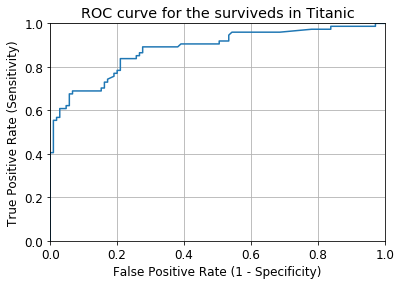

In [38]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities

# we pass y_test and y_pred_prob
# we do not use y_pred_class, because it will give incorrect results without generating an error
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for the surviveds in Titanic')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [39]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00952381, 0.00952381,
       0.00952381, 0.00952381, 0.01904762, 0.01904762, 0.02857143,
       0.02857143, 0.04761905, 0.04761905, 0.05714286, 0.05714286,
       0.06666667, 0.06666667, 0.13333333, 0.15238095, 0.15238095,
       0.16190476, 0.16190476, 0.17142857, 0.17142857, 0.19047619,
       0.19047619, 0.2       , 0.2       , 0.20952381, 0.20952381,
       0.20952381, 0.22857143, 0.24761905, 0.25714286, 0.25714286,
       0.26666667, 0.26666667, 0.27619048, 0.27619048, 0.2952381 ,
       0.38095238, 0.39047619, 0.43809524, 0.48571429, 0.5047619 ,
       0.5047619 , 0.52380952, 0.53333333, 0.53333333, 0.54285714,
       0.56190476, 0.57142857, 0.6       , 0.60952381, 0.63809524,
       0.65714286, 0.67619048, 0.68571429, 0.78095238, 0.81904762,
       0.83809524, 0.83809524, 0.87619048, 0.8952381 , 0.97142857,
       0.97142857, 1.        ])

In [40]:
thresholds > 0.5

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [41]:
print(thresholds)

[1.94020273 0.94020273 0.93258876 0.92325151 0.91966565 0.90628616
 0.90138476 0.79314415 0.78383891 0.75602216 0.74909599 0.74055651
 0.73994282 0.73370806 0.72214942 0.70579074 0.69558147 0.67853439
 0.6784656  0.66513104 0.65556314 0.63855197 0.51719865 0.51196529
 0.50130233 0.47975558 0.469573   0.46919716 0.457341   0.45580659
 0.45344399 0.44583625 0.43473498 0.43337631 0.40358707 0.39336199
 0.34622285 0.33898128 0.33389633 0.32823209 0.32538682 0.32249347
 0.31519628 0.29356693 0.27794813 0.22297001 0.21929626 0.17095041
 0.16610762 0.13848748 0.13779991 0.13721992 0.12849093 0.12691277
 0.12612119 0.12378895 0.12275909 0.12149384 0.12036009 0.11923549
 0.11701352 0.11482757 0.1138944  0.11267724 0.1044244  0.10244634
 0.10050154 0.09359693 0.09126247 0.07580221 0.07504747 0.03520504]


In [42]:
#tpr[threshold > valeur] nous permert d'valuer le tpr selon cette valeur donc on peut etuliser une methode qui nous permet  d'evaluer nos threshold et choisir la plus optimale

In [43]:
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [44]:
evaluate_threshold(0.5)

Sensitivity: 0.7027027027027027
Specificity: 0.8476190476190476


In [45]:
evaluate_threshold(0.65)

Sensitivity: 0.6756756756756757
Specificity: 0.9333333333333333


In [46]:
evaluate_threshold(0.85)

Sensitivity: 0.22972972972972974
Specificity: 1.0


In [47]:
y_pred_class = binarize(y_pred_prob1, 0.65)
print(metrics.accuracy_score(y_test, y_pred_class[:,1]))

0.8268156424581006


# AUC

In [48]:
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.8821106821106821


In [49]:
#calcul l'aire de la partie inferieur a la courba ROC
#Lors de l'utilisation d'unités normalisées, l'aire sous la courbe (souvent appelée simplement l'ASC) est égale à la probabilité qu'un classificateur classe un cas positif choisi au hasard plus élevé qu'une instance négative choisie au hasard 
#(en supposant que les classements 'positifs' soient supérieurs à ' Négatif').[] 13]

# tree

In [50]:
from sklearn import tree

In [51]:
tree1 = tree.DecisionTreeClassifier()

In [52]:
tree1.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [53]:
predict11 = tree1.predict(x_test)

In [54]:
predict11 = tree1.predict(x_test)

accuracy 0.7821229050279329


In [55]:
print('recall', metrics.recall_score(predict11,y_test))

recall 0.7611940298507462


In [56]:
import graphviz

In [57]:
from sklearn.tree import export_graphviz
dat = tree.export_graphviz(tree1, out_file = None)

In [58]:
graph = graphviz.Source(dat)

In [59]:
graph.render("data")

'data.pdf'

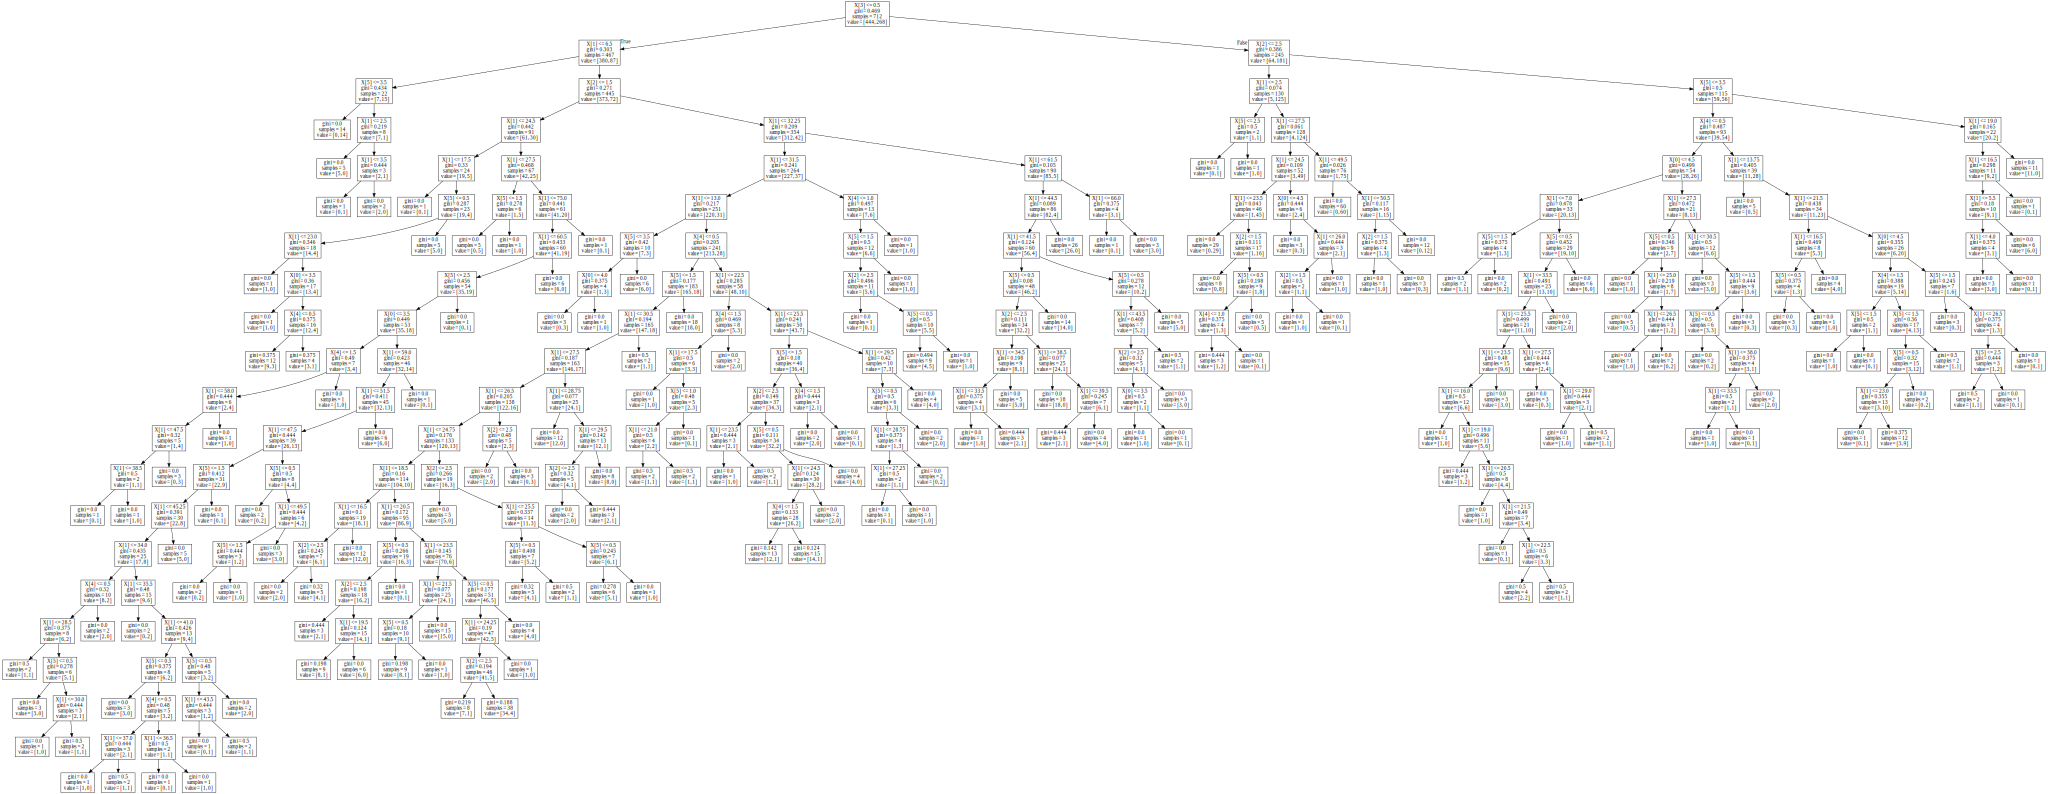

In [60]:
graph

In [61]:
df.to_csv("titanicv2")